In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


<IPython.core.display.Javascript object>


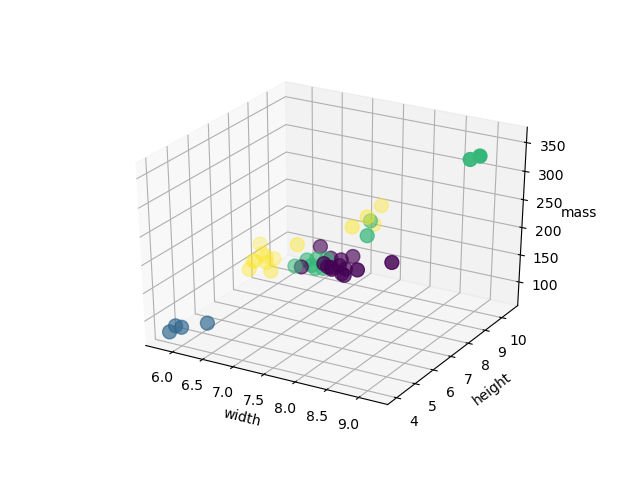

In [2]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset

# import datasets and visualize it
df = pd.read_table('readonly/fruit_data_with_colors.txt')
X = df[['mass','width','height']]
y = df['fruit_label']
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])
np.set_printoptions(precision=2)

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

# 3d scatter plot
from matplotlib import cm
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'],X_train['height'],X_train['mass'] ,c = y_train,marker = 'o',s=100)
ax.set_xlabel("width")
ax.set_ylabel("height")
ax.set_zlabel("mass")
plt.show()

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)





# Classification

In [5]:
#train the classifier and test its accuracy using test set
knn  = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
score = knn.score(X_test,y_test)
# test the classifier against the unknown data
df.head()
values = [[160,5.1,3.2]]
ans = knn.predict(values)
df['fruit_name'][ans]


1    apple
Name: fruit_name, dtype: object

# K Nereast Neighbors

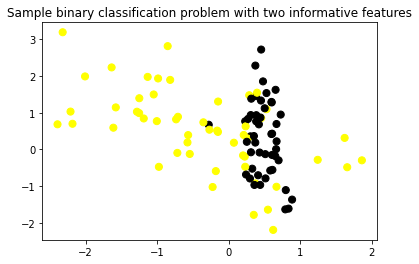

In [6]:
# synthetic dataset for classification (binary) 
from sklearn.datasets import make_classification
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

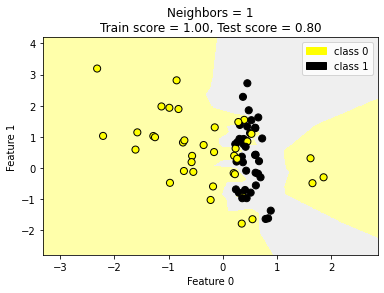

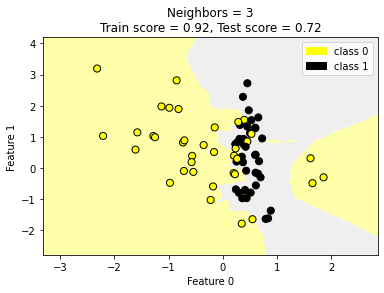

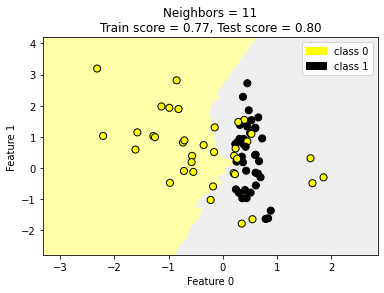

In [7]:
# synthetic dataset for classification (binary) dependence in K value
from adspy_shared_utilities import plot_two_class_knn

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,
                                                   random_state=0)

plot_two_class_knn(X_train, y_train, 1, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 3, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 11, 'uniform', X_test, y_test)

<IPython.core.display.Javascript object>


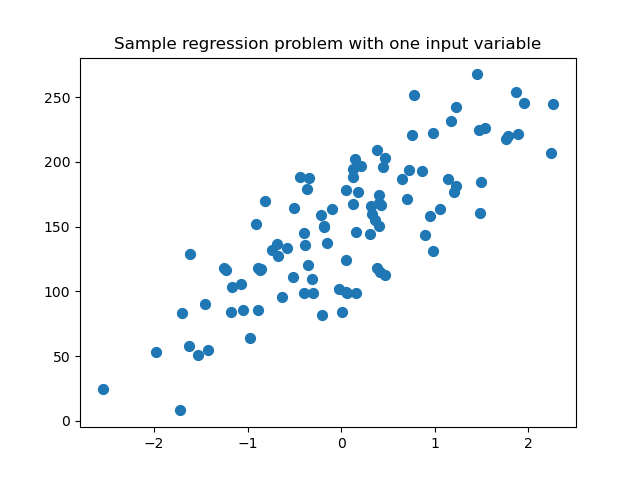

<IPython.core.display.Javascript object>


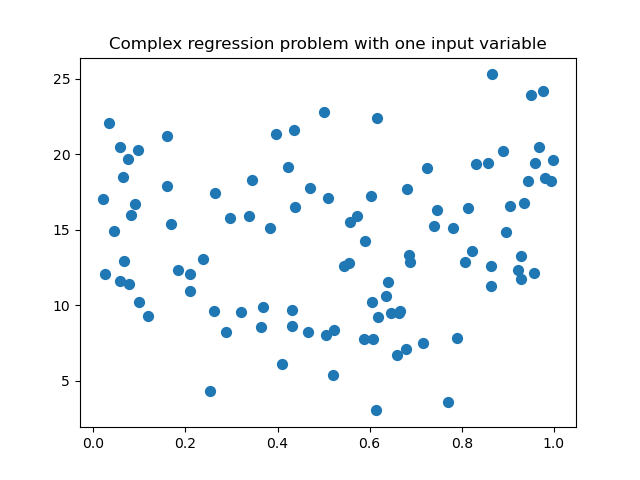

In [3]:
# Regression dataset
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

# Regression

In [10]:
# Regression train and test/predict
from sklearn.neighbors import KNeighborsRegressor
X_train,X_test,y_train,y_test = train_test_split(X_R1,y_R1,random_state=0)
knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train,y_train)
print(knnreg.predict(X_test))
print("The score for the test data is {:.2f}".format(knnreg.score(X_test,y_test)))

[231.71 148.36 150.59 150.59  72.15 166.51 141.91 235.57 208.26 102.1
 191.32 134.5  228.32 148.36 159.17 113.47 144.04 199.23 143.19 166.51
 231.71 208.26 128.02 123.14 141.91]
The score for the test data is 0.42


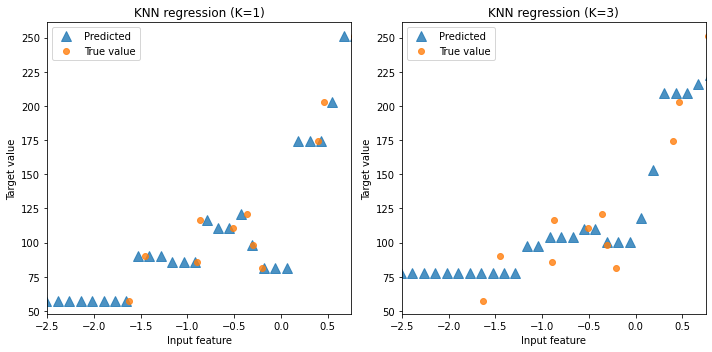

In [11]:
#plot regression 
figure, subaxes = plt.subplots(1,2,figsize=(10,5))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X_R1[0::5],y_R1[0::5],random_state=0)

for thisaxis, K in zip(subaxes,[1,3]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train,y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    thisaxis.set_xlim([-2.5, 0.75])
    thisaxis.plot(X_predict_input, y_predict_output,'^',markersize=10,label='Predicted', alpha=0.8)
    thisaxis.plot(X_train,y_train,'o',label='True value',alpha = 0.8)
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()

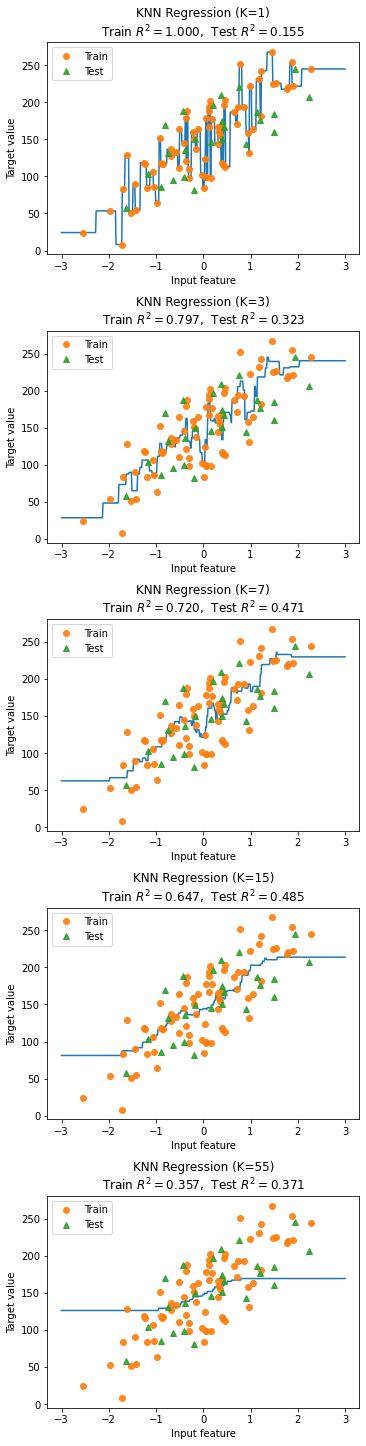

In [12]:
# Dependence on classifier neighbors
#plot regression 
figure, subaxes = plt.subplots(5,1,figsize=(5,20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X_R1,y_R1,random_state=0)

for thisaxis, K in zip(subaxes,[1,3,7,15,55]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train,y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

# Least Square Linear Model

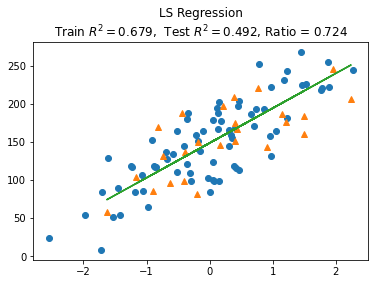

In [13]:
#linear Regression
from sklearn.linear_model import LinearRegression

X_train,X_test,y_train,y_test = train_test_split(X_R1,y_R1,random_state=0)

linreg = LinearRegression().fit(X_train,y_train)

#print("The predicted target value for test data is {:}".format(linreg.predict(X_test)))
Ltrain_score = linreg.score(X_train,y_train)
Ltest_score = linreg.score(X_test,y_test)
ratio1 = Ltest_score/Ltrain_score

#lin plot
plt.figure()
plt.plot(X_train,y_train,'o')
plt.plot(X_test,y_test,'^')
plt.plot(X_test,linreg.predict(X_test))
plt.title('LS Regression\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$, Ratio = {:.3f}'.format(Ltrain_score,Ltest_score,ratio1))
plt.show()



# KNN VS Least square model

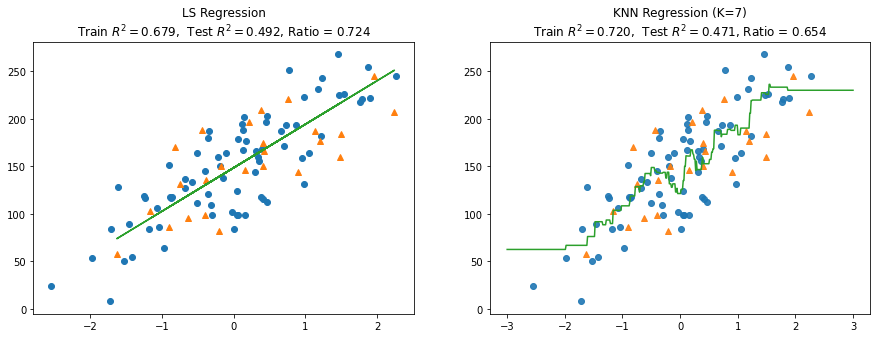

<Figure size 432x288 with 0 Axes>

In [14]:
#linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

X_train,X_test,y_train,y_test = train_test_split(X_R1,y_R1,random_state=0)
K=7
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)

linreg = LinearRegression().fit(X_train,y_train)
knnreg = KNeighborsRegressor(n_neighbors=K).fit(X_train,y_train)
Ktrain_score = knnreg.score(X_train,y_train)
Ktest_score = knnreg.score(X_test,y_test)
ratio2 = Ktest_score/Ktrain_score
#print("The predicted target value for test data is {:}".format(linreg.predict(X_test)))
Ltrain_score = linreg.score(X_train,y_train)
Ltest_score = linreg.score(X_test,y_test)
ratio1 = Ltest_score/Ltrain_score
#plots
figure, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5)) 
#lin plot
plt.figure()
ax1.plot(X_train,y_train,'o')
ax1.plot(X_test,y_test,'^')
ax1.plot(X_test,linreg.predict(X_test))
ax1.set_title('LS Regression\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$, Ratio = {:.3f}'.format(Ltrain_score,Ltest_score,ratio1))

#knnplot

ax2.plot(X_train,y_train,'o',alpha=0.9,label = 'Train')
ax2.plot(X_test,y_test,'^',alpha=0.9,label = 'Test')
ax2.plot(X_predict_input,knnreg.predict(X_predict_input))
ax2.set_title('KNN Regression (K={:})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$, Ratio = {:.3f}'.format(K,Ktrain_score,Ktest_score,ratio2))
plt.show()

# Feature weight(w) & Constant bias term (b)

In [12]:
from sklearn.linear_model import LinearRegression



X_train,X_test,y_train,y_test = train_test_split(X_R1, y_R1,random_state=0)

linreg = LinearRegression().fit(X_train,y_train)
score_test = "{:.2f}".format(linreg.score(X_test,y_test))
score_train = "{:.2f}".format(linreg.score(X_train,y_train))
print("The feature_weight w is {:}".format(linreg.coef_))
print("The constant_bias/intercept b is {:.3f}".format(linreg.intercept_))

predict = linreg.predict(X_test)

print("The predicted value is {:}".format(predict))

The feature_weight w is [45.71]
The constant_bias/intercept b is 148.446
The predicted value is [237.61 130.74 166.84 166.82  73.93 155.59 140.22 216.74 200.53  95.19
 189.62 119.45 216.47 130.08 168.02 107.52 128.42 183.23 165.73 157.97
 250.87 203.4  111.28 114.52 139.07]


# Ridge Regression

The test score is 0.55
The train score is 0.65
The target values are [219.23 134.44 163.08 163.06  89.37 154.16 141.96 202.67 189.81 106.23
 181.15 125.48 202.46 133.92 164.02 116.01 132.6  176.09 162.2  156.04
 229.75 192.09 119.   121.57 141.05]
The intercept b is 148.49
The feature coefficient w is [36.27]


<IPython.core.display.Javascript object>


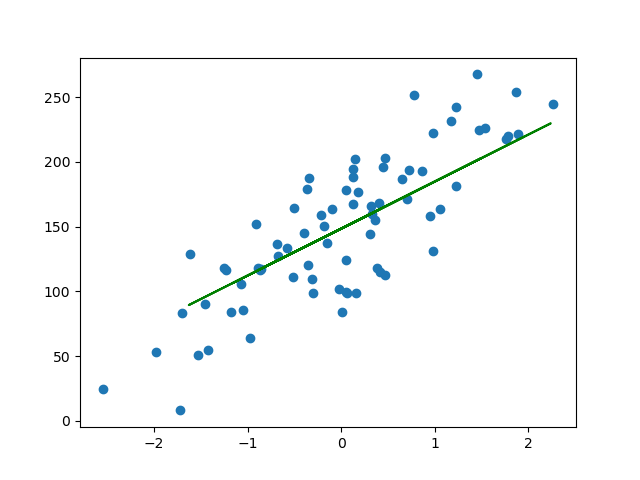

In [17]:
from sklearn.linear_model import Ridge
X_train,X_test,y_train,y_test = train_test_split(X_R1, y_R1,random_state=0)

linridge = Ridge(alpha=20.0).fit(X_train,y_train)
print("The test score is {:.2f}".format(linridge.score(X_test,y_test)))
print("The train score is {:.2f}".format(linridge.score(X_train,y_train)))
print("The target values are {}".format(linridge.predict(X_test)))
print("The intercept b is {:.2f}".format(linridge.intercept_))
print("The feature coefficient w is {}".format(linridge.coef_))

plt.figure()
plt.scatter(X_train,y_train)
plt.plot(X_test,linridge.predict(X_test),color='g')

# Lasso Regression

The train score is 0.5974803548421078
The test score is 0.6510923736832277


<IPython.core.display.Javascript object>


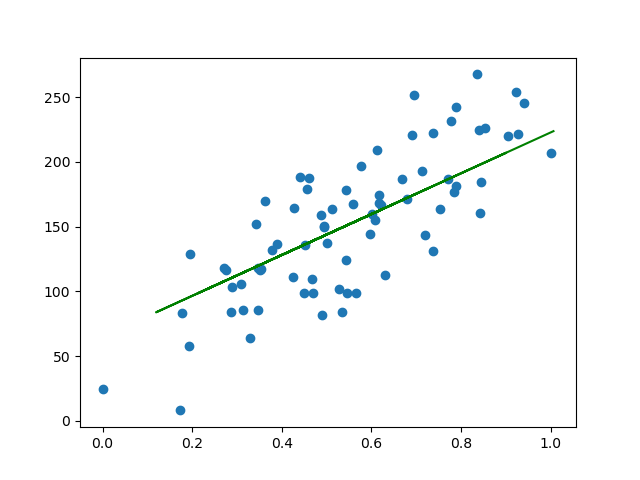

In [44]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
X_train,X_test,y_train,y_test = train_test_split(X_R1, y_R1,random_state=20)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
linlasso = Lasso(alpha = 2.0).fit(X_train_scaled,y_train)
print("The train score is {:}".format(linlasso.score(X_train_scaled,y_train)))
print("The test score is {:}".format(linlasso.score(X_test_scaled,y_test)))

plt.figure()
plt.scatter(X_train_scaled,y_train)
plt.plot(X_test_scaled,linlasso.predict(X_test_scaled),color='g')


# Polynomial feature with ridge regression

In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
poly = PolynomialFeatures(degree=2)
X_R1_poly = poly.fit_transform(X_R1)
X_train,X_test,y_train,y_test = train_test_split(X_R1_poly, y_R1, random_state=0)
linridge =  Ridge(alpha=20.0).fit(X_train,y_train)

print("The score for train set is {:.2f}".format(linridge.score(X_train,y_train)))
print("The score for test set is {:.2f}".format(linridge.score(X_test,y_test)))

The score for train set is 0.65
The score for test set is 0.55
